# Метод интерполяции

## Реализация

Цель задания -- реализация метода интерполяции функции и проверка точности. Будем использовать кубический сплайн дефекта 1 и метод прогонки для вычисления коэффициентов.

### Описание алгоритма

Вспомним, что такое интерполяция кубическими сплайнами. У нас дана сетка $\{(x_i, y_i) \ | \ y_i=f(x_i)\}_{i=0}^n$, значения функции в данных точках. Наша цель  -- приблизить $f$ на каждом отрезке $[x_{i-1}, x_{i}]$ кубическим многочленом вида:

$$ S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3 $$

Мы накладываем условие, что для каждого такого полинома его первые три производные (с 0 по 2) в соответствующих узлах сетки совпадают с данными показателями у $f$, а также, что первые 3 производные совпадают у смежных полиномов в граничных точках соответствующих им отрезков.

$$ S_{i-1}(x_{i-1})=S_{i}(x_{i-1}), \ S_{i-1}'(x_{i-1})=S_{i}'(x_{i-1}), \ S_{i-1}''(x_{i-1})=S_{i}''(x_{i-1})$$

Формулы производных:

$$ S_i'(x)=b_i+2c_i(x-x_i)+3d_i(x-x_i)^2 $$

$$ S_i''(x)=2c_i+6d_i(x-x_i) $$

Также накладываем условие, что в крайних точках вторая производная равна 0, т.е. $S_1''(x_0)=S_n''(x_n)=0$

Наша цель -- найти коэффициенты всех полиномов. Далее будем обозначать $h_i=x_i-x_{i-1}$.

Для начала заметим, что $y_i=f(x_i)=S_i(x_i)=a_i$, уже нашли часть коэффициентов. 

В то же время $y_i=f(x_i)=S_{i+1}(x_i)=a_{i+1}-b_{i+1}h_i+c_{i+1}h_i^2-d_{i+1}h_i^3$.

Аналогично с производными: $S_{i-1}'(x_{i-1})=S_{i}'(x_{i-1}) \Leftrightarrow b_{i-1}=b_{i}-2c_{i}h_i+3d_{i}h_i^2$,
$S_{i-1}''(x_{i-1})=S_{i}''(x_{i-1}) \Leftrightarrow c_{i-1}=c_{i}-3d_{i-1}h_i$

Далее можно выраизить все через $c_i$, $y_i$ и $h_i$, и записать систему уравнений на $c_i$:

$$b_i=\frac{y_i-y_{i-1}}{h_i}+\frac{h_i}{3}(c_{i-1}+2c_i)$$

$$d_i=\frac{c_i-c_{i-1}}{3h_i}$$

$$c_{i-1}h_{i}+2c_i(h_{i+1}+h_i) + c_{i+1}h_{i+1}=3\cdot\left(\frac{y_{i+1}-y_i}{h_{i+1}}-\frac{y_i-y_{i-1}}{h_i}\right)$$

Также полагаем, что $c_0=c_n=0$.
Последнюю систему линейных неравенств можно решить с помощью метода прогонки, т.к. матрица коэффициентов представляет с собой трехдиагональную матрицу.

$$
\begin{pmatrix}
C_1 & B_1 & 0 & \ldots & 0 & 0 & 0\\
A_2 & C_2 & B_2 & \ldots & 0 & 0 & 0\\
0 & A_3 & C_3 & \ldots & 0 & 0 & 0\\
0 & 0 & A_4 & \ldots & B_{n-3} & 0 & 0\\
0 & 0 & 0 & \ldots & C_{n-2} & B_{n-2} & 0\\
0 & 0 & 0 & \ldots & A_{n-1} & C_{n-1} & B_{n-1}\\
0 & 0 & 0 & \ldots & 0 & A_{n} & C_n\\
\end{pmatrix}
\cdot
\begin{pmatrix}
c_1\\
c_2\\
c_3\\
\ldots\\
c_{n-2}\\
c_{n-1}\\
c_n
\end{pmatrix}
=
\begin{pmatrix}
F_1\\
F_2\\
F_3\\
\ldots\\
F_{n-2}\\
F_{n-1}\\
F_n
\end{pmatrix}
$$
где $A_i=h_{i}$, $C_i=2(h_{i+1}+h_i)$, $B_i=h_{i+1}$, $F_i$ -- правые части уравнений. Решив систему, сможем затем вычислить остальные коэффициенты сплайна.

### Алгоритм прогонки
Алгоритм прогонки является адаптацией метода Гаусса для случая трехдиагональной матрицы коэффициентов. Система уравнений имеет вид:

$$A_ix_{i-1}+C_ix_i+B_ix_{i+1}=F_i$$

Мы предполагаем, что неизвестные связаны рекуррентным соотношением $x_i=p_{i+1}x_{i+1}+q_{i+1}$.
Тогда при подстановек данной формулы в уравнения, получим соотношение:

$$
\left\{
\begin{aligned}
p_{i+1}&=\frac{-B_i}{A_ip_i+C_i}\\
q_{i+1}&=\frac{F_i-A_iq_i}{A_ip_i+C_i}
\end{aligned}
\right.
$$

После этого ищем неизвестные, спускаясь вниз по индексу, полагая $x_n=q_{n+1}$. В результате найдем $c_1, \ldots, c_{n-1}$. Затем, добавив информацию, что $c_0=c_n=0$, вычислим $b_i, d_i$. 

### Вычисление значения сплайна
Таким образом сплайн у нас задается опорной выборкой $x_i$, и коэффициентами $a_i, b_i, c_i, d_i$. Функция, вычисляющая значение сплайна в точке, будет заключаться в обнаружении подходящего отрезка и в положительном случае вычислении кубического многочлена с подходящими коэффициентами.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def TDMA(A, B, C, F):
    '''
    A: shape = (n,), A[0] == 0
    B: shape == (n,), B[-1] == 0
    C: shape == (n,)
    F: shape == (n,)
    '''
    n = C.size
    p = np.zeros(n)
    q = np.zeros(n)
    x = np.zeros(n)
    for i in range(C.size - 1):
        p[i + 1] = -B[i] / (A[i] * p[i] + C[i])
        q[i + 1] = (F[i] - A[i] * q[i]) / (A[i] * p[i] + C[i])
    x[n - 1] = (F[n - 1] - A[n - 1] * q[n - 1]) / (A[n - 1] * p[n - 1] + C[n - 1])
    for i in range(n - 1):
        x[n - 2 - i] = x[n - 1 - i] * p[n - 1 - i] + q[n - 1 - i]
    return x

In [3]:
def make_spline(grid):
    a, b, c, d = None, None, None, None
    a = grid[1, 1:]
    h = np.diff(grid[0])
    A = np.zeros(h.size - 1)
    A[1:] = h[1:-1]
    B = np.zeros(h.size - 1)
    B[:-1] = h[1:-1]
    C = 2 * (h[:-1] + h[1:])
    F = 3 * ((grid[1, 2:] - grid[1, 1:-1]) / h[1:] - (grid[1, 1:-1] - grid[1, :-2]) / h[:-1])
    c = np.zeros(h.size + 1)
    res = TDMA(A, B, C, F)
    c[1:-1] = res
    d = (c[1:] - c[:-1]) / (3 * h)
    b = (grid[1, 1:] - grid[1, :-1]) / h + h * (c[:-1] + 2 * c[1:]) / 3
    spline = { 'x': grid[0], 0 : a, 1 : b, 2 : c[1:], 3 : d }
    return spline

In [4]:
def spline_calc(spline, t, derivative=0):
    x = spline['x']
    if t < x[0] or t > x[-1]:
        return np.nan
    i = (x < t).sum()
    h = t - x[i]
    if derivative == 1:
        return spline[1][i - 1] + 2 * h * spline[2][i - 1] + 3 * h**2 * spline[3][i - 1]
    elif derivative == 2:
        return 2 * spline[2][i - 1] + 6 * h * spline[3][i - 1]
    return sum(h ** j * spline[j][i - 1] for j in range(4))

## Тестирование

Рассмотрим отрезок $[-1, 1]$ и функции, которые различаются на гладкие, разрывные и осциллирующие на этом отрезке:
1. $f(x)=-1/(x+2) + 2$
2. $g(x)=\begin{cases}5x^4 - 4, & x < 0\\1-x, & \text{иначе}\end{cases}$
3. $h(x)=\sin{150x}$

Проведем опыт с каждой из них.

Построим 2 сетки размера $N_0=8$ и $N_1=20$. Нарисуем графики функции $F$ и сплайна, построенного на этих сетках. Отдельно нарисуем график разности $E(x)=F(x)-S(x)$, где $S$ -- интерполяция по самой густой сетке. Также расположим на графиках значения функций в опорных точках, заметим что на графиках ошибок ордината в таких точках всегда равна 0.


In [5]:
def f(x):
    return -1 / (x + 2) + 2

def g(x):
    return 1 - x if x > 0 else (5 * x ** 4 - 4 if x < 0 else np.nan)

def h(x):
    return np.sin(150 * x)


labels = ['f(x)', 'g(x)', 'h(x)']
functions = [f, g, h]
functions_v = [np.vectorize(func) for func in functions]
A = -1
B = 1

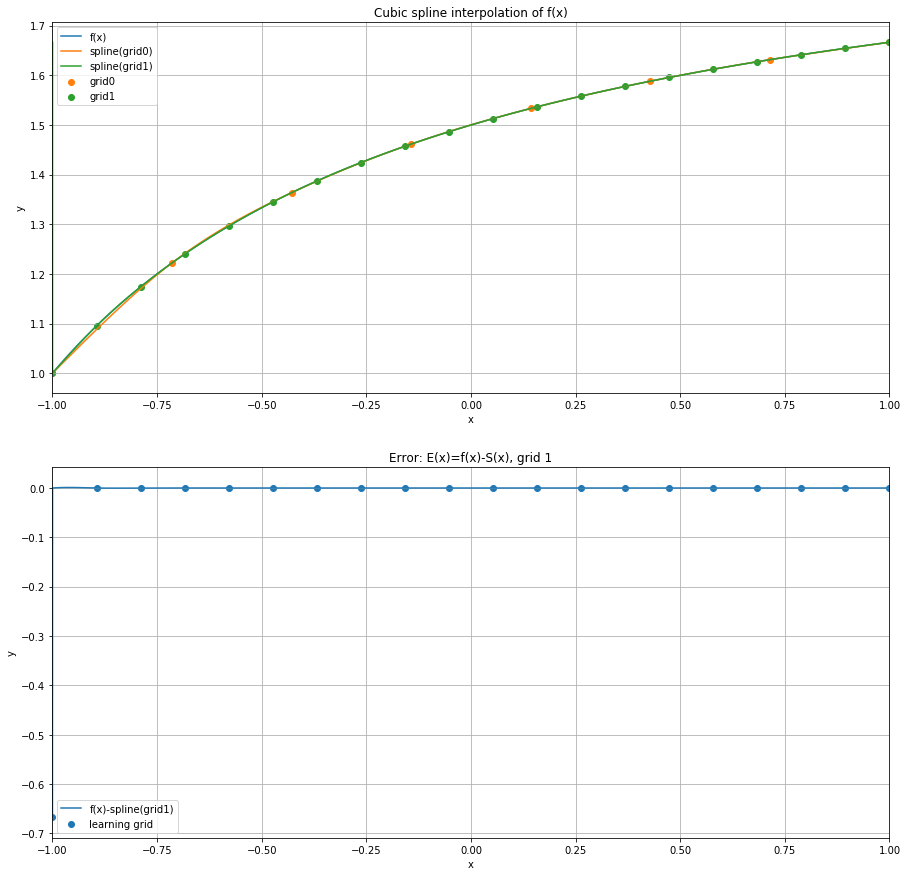

In [6]:
x = np.linspace(A, B, 100000)
y = functions_v[0](x)
x0 = np.linspace(A, B, 8)
x1 = np.linspace(A, B, 20)
y0 = functions_v[0](x0)
y1 = functions_v[0](x1)
spline0 = make_spline(np.array([x0, y0]))
spline1 = make_spline(np.array([x1, y1]))

res0 = np.zeros(x.size)
res1 = np.zeros(x.size)
for i in range(x.size):
    res0[i] = spline_calc(spline0, x[i])
    res1[i] = spline_calc(spline1, x[i])

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)

plt.plot(x, y, label=r'f(x)')
plt.plot(x, res0, label='spline(grid0)')
plt.plot(x, res1, label='spline(grid1)')
plt.scatter(x0, y0, label='grid0', c='C1')
plt.scatter(x1, y1, label='grid1', c='C2')

plt.title('Cubic spline interpolation of f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(A, B)
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
res1_g = np.zeros(x1.size)
for i in range(x1.size):
    res1_g[i] = spline_calc(spline1, x1[i])
plt.scatter(x1, y1 - res1_g, label='learning grid')
plt.plot(x, y - res1, label='f(x)-spline(grid1)')
plt.title('Error: E(x)=f(x)-S(x), grid 1')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(A, B)
plt.grid(True)
plt.legend()

plt.show()

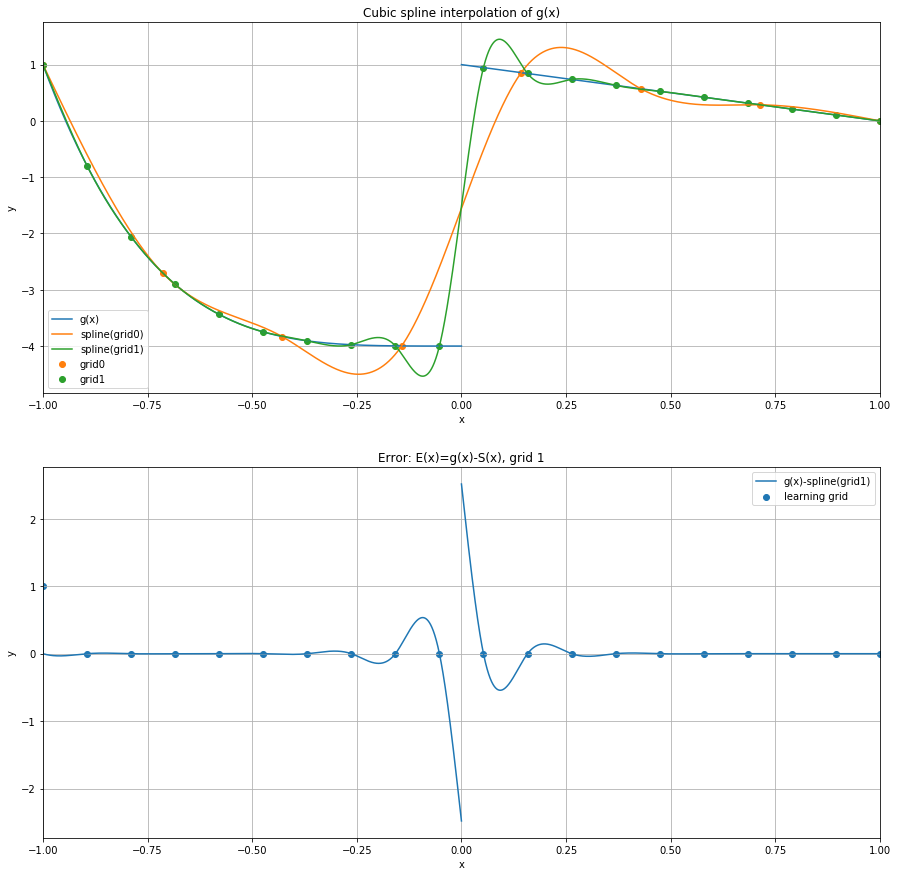

In [7]:
x = np.linspace(A, B, 100000)
x0 = np.linspace(A, B, 8)
x1 = np.linspace(A, B, 20)
y0 = functions_v[1](x0)
y1 = functions_v[1](x1)
spline0 = make_spline(np.array([x0, y0]))
spline1 = make_spline(np.array([x1, y1]))

res0 = np.zeros(x.size)
res1 = np.zeros(x.size)
for i in range(x.size):
    res0[i] = spline_calc(spline0, x[i])
    res1[i] = spline_calc(spline1, x[i])

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
x_left = x[x < 0]
x_right = x[x >= 0]
y_left = functions_v[1](x_left)
y_right = functions_v[1](x_right)

plt.plot(x_left, y_left, label=r'g(x)')
plt.plot(x_right, y_right, c='C0')
plt.plot(x, res0, label='spline(grid0)')
plt.plot(x, res1, label='spline(grid1)')
plt.scatter(x0, y0, label='grid0', c='C1')
plt.scatter(x1, y1, label='grid1', c='C2')

plt.title('Cubic spline interpolation of g(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(A, B)
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
res1_g = np.zeros(x1.size)
for i in range(x1.size):
    res1_g[i] = spline_calc(spline1, x1[i])
plt.scatter(x1, y1 - res1_g, label='learning grid')
plt.plot(x_left, y_left - res1[x < 0], label='g(x)-spline(grid1)')
plt.plot(x_right, y_right - res1[x >= 0], c='C0')
plt.title('Error: E(x)=g(x)-S(x), grid 1')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(A, B)
plt.grid(True)
plt.legend()

plt.show()

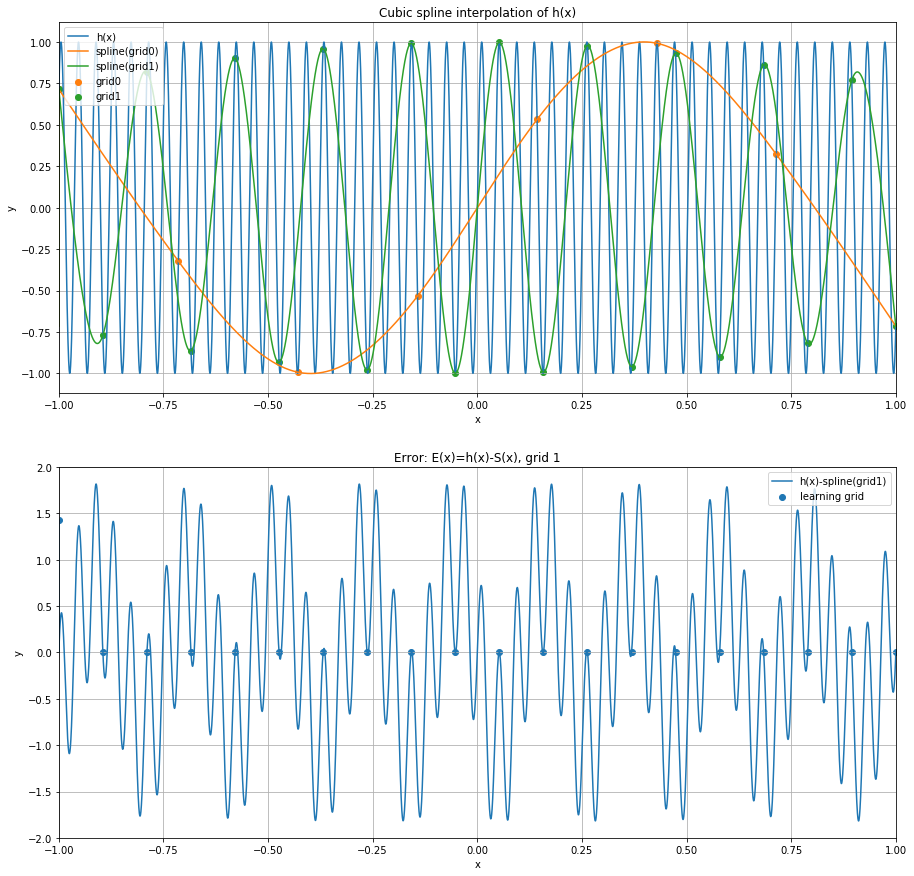

In [8]:
x = np.linspace(A, B, 100000)
y = functions_v[2](x)
x0 = np.linspace(A, B, 8)
x1 = np.linspace(A, B, 20)
y0 = functions_v[2](x0)
y1 = functions_v[2](x1)
spline0 = make_spline(np.array([x0, y0]))
spline1 = make_spline(np.array([x1, y1]))

res0 = np.zeros(x.size)
res1 = np.zeros(x.size)
for i in range(x.size):
    res0[i] = spline_calc(spline0, x[i])
    res1[i] = spline_calc(spline1, x[i])

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)

plt.plot(x, y, label=r'h(x)')
plt.plot(x, res0, label='spline(grid0)')
plt.plot(x, res1, label='spline(grid1)')
plt.scatter(x0, y0, label='grid0', c='C1')
plt.scatter(x1, y1, label='grid1', c='C2')

plt.title('Cubic spline interpolation of h(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(A, B)
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
res1_g = np.zeros(x1.size)
for i in range(x1.size):
    res1_g[i] = spline_calc(spline1, x1[i])
plt.scatter(x1, y1 - res1_g, label='learning grid')
plt.plot(x, y - res1, label='h(x)-spline(grid1)')
plt.title('Error: E(x)=h(x)-S(x), grid 1')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(A, B)
plt.grid(True)
plt.legend()

plt.show()